In [1]:
"""
Advertising Sales data
Finding the best fit line using sckit-learn model
Error anlysis is done by plotting the histogram of the errors
"""

'\nAdvertising Sales data\nFinding the best fit line using sckit-learn model\nError anlysis is done by plotting the histogram of the errors\n'

In [2]:
# Importing 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 

# supress the warning 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

advertising = pd.read_csv('D:Advertising.csv')
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# Peeking the data

advertising.shape

(200, 5)

In [5]:
# Peeking the data

advertising.shape

(200, 5)

In [6]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


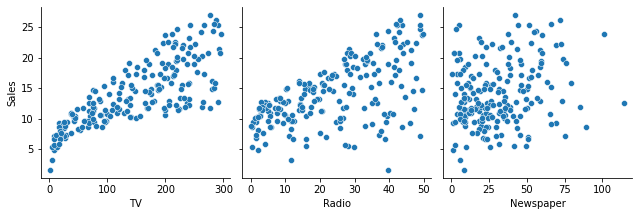

In [7]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio' , 'Newspaper'] , y_vars = 'Sales', size = 3 , kind = 'scatter')

<AxesSubplot:>

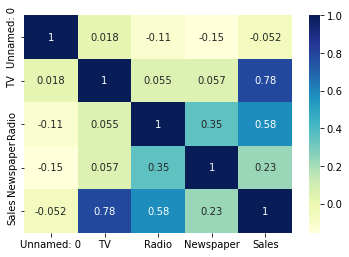

In [8]:
sns.heatmap(advertising.corr() , cmap = 'YlGnBu'  , annot = True)

In [13]:
feature_cols = ['TV', 'Radio', 'Newspaper']
x = advertising[feature_cols]
y = advertising['Sales']

In [ ]:
# Regression Line for test dataset

In [20]:
# Splitting the data into Train and Test (70:30)

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(x,y,train_size =0.7, test_size = 0.3, random_state = 1)

In [18]:
"""X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)"""

In [22]:
#Fitting the model using scikit-learn

from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 

lm.fit(X_train_lm,Y_train_lm)

LinearRegression()

In [23]:
print (lm.intercept_)

2.9372157346906125


In [28]:
list(zip(feature_cols, lm.coef_))

[('TV', 0.04695204776848464),
 ('Radio', 0.17658643526817366),
 ('Newspaper', 0.001851153318892224)]

In [29]:
Y_train_pred = lm.predict(X_train_lm)
Y_test_pred = lm.predict(X_test_lm)

In [30]:
from sklearn.metrics import r2_score

print(r2_score(Y_train_lm,Y_train_pred))

0.8850053786777521


In [31]:
print(r2_score(Y_test_lm,Y_test_pred))

0.9224605706201434


In [36]:
# Error analysis
y_train_pred = lm.predict(X_train_lm)
res= (Y_train_lm-y_train_pred)

Text(0, 0.5, 'frequency')

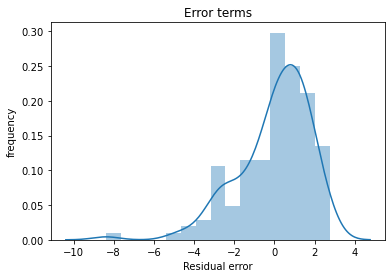

In [37]:
# Plotting the histogram of the errors

sns.distplot(res,bins =15)
plt.title('Error terms')
plt.xlabel ('Residual error')
plt.ylabel('frequency')

In [38]:
# Predicting
y_test_pred = lm.predict(X_test_lm)

In [39]:
res_test = (Y_test_lm - y_test_pred)

Text(0, 0.5, 'frequency')

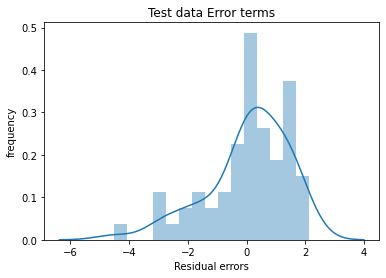

In [40]:
# Plotting the Histogram of the errors 

sns.distplot(res_test,bins =15)
plt.title('Test data Error terms')
plt.xlabel ('Residual errors')
plt.ylabel('frequency')